# statistical features

In [2]:
import pandas as pd
import os
#import librosa
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pathlib

In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# !kaggle datasets download -d danukhan/heart-sound-classification

# #for unzipping aptos dataset

# import zipfile
# zip_ref = zipfile.ZipFile('/content/heart-sound-classification.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

# # Defining path

# audio_dataset_path='/content/Dataset'
# metadata=pd.read_csv('/content/Dataset/annotations/Online_Appendix_training_set.csv')


In [4]:
# def extract_features(audio_file):
#     try:
#         # Load the audio file
#         y, sr = librosa.load(audio_file)

#         # Extract statistical features
#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#         rmse = librosa.feature.rms(y=y)
#         spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
#         spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#         spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#         zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

#         # Calculate statistical measures (mean, standard deviation, etc.) for each feature
#         chroma_mean = np.mean(chroma_stft)
#         chroma_std = np.std(chroma_stft)
#         rmse_mean = np.mean(rmse)
#         rmse_std = np.std(rmse)
#         spectral_centroid_mean = np.mean(spectral_centroid)
#         spectral_centroid_std = np.std(spectral_centroid)
#         spectral_bandwidth_mean = np.mean(spectral_bandwidth)
#         spectral_bandwidth_std = np.std(spectral_bandwidth)
#         spectral_rolloff_mean = np.mean(spectral_rolloff)
#         spectral_rolloff_std = np.std(spectral_rolloff)
#         zero_crossing_rate_mean = np.mean(zero_crossing_rate)
#         zero_crossing_rate_std = np.std(zero_crossing_rate)

#         # Create a list to store the features
#         features=[ chroma_mean, chroma_std, rmse_mean, rmse_std ,  spectral_centroid_mean, spectral_centroid_std, spectral_bandwidth_mean, spectral_bandwidth_std, spectral_rolloff_mean, spectral_rolloff_std,  zero_crossing_rate_mean,  zero_crossing_rate_std]

#         return features

#     except Exception as e:
#         print(f"Error processing {audio_file}: {str(e)}")
#         return None

In [5]:
# ### Now we iterate through every audio file and extract features for statistical features

# extracted_features=[]

# for index_num,row in tqdm(metadata.iterrows()):
#     file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["Database"]),str(row["Challenge record name"])+".wav")
#     final_class_labels=row["Class (-1=normal 1=abnormal)"]

#     data2=extract_features(file_name)
#     extracted_features.append([data2,final_class_labels])

In [6]:
# extracted_features_df=pd.DataFrame(extracted_features,columns=['stats_features','class_stats'])
# extracted_features_df.to_csv("statistical_feature.csv", index=False)

# extracted_features_df.head()

In [7]:
curr_dir = pathlib.Path('__main__')
home_dir = curr_dir.parent.parent.parent
data_file = home_dir.as_posix() + './data/raw/final_features.csv'
data_file

'../data/raw/final_features.csv'

In [8]:
ds_final=pd.read_csv(data_file)

In [9]:
ds_final.head(3)

,mfcc_features,stats_features,class,mfccAndstats
0,[-5.6953815e+02 1.2421279e+02 8.0652779e+01 ...,"[0.77510417, 0.17327987, 0.017438788, 0.013340...",1,"[-569.5381469726562, 124.2127914428711, 80.652..."
1,[-6.2090100e+02 1.4365808e+02 9.8682190e+01 ...,"[0.6560219, 0.26515478, 0.01156608, 0.00640989...",1,"[-620.9010009765625, 143.6580810546875, 98.682..."
2,[-5.9319940e+02 8.4551582e+01 5.9887196e+01 ...,"[0.7897404, 0.16739461, 0.016527515, 0.0146522...",1,"[-593.1994018554688, 84.55158233642578, 59.887..."


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(ds_final['stats_features'].to_list(), ds_final['class'].to_list(), test_size=0.2, stratify=ds_final['class'].to_list(), random_state=42)

In [11]:
#X_train= X_train['mfccAndstats'].tolist()
for i in range(len(X_train)):
  X_train[i]=X_train[i].split(',')
  for j in range(len(X_train[i])):
    X_train[i][j]=float(X_train[i][j].strip("[]"))

#X_test= X_test['mfccAndstats'].tolist()
for i in range(len(X_test)):
  X_test[i]=X_test[i].split(',')
  for j in range(len(X_test[i])):
    X_test[i][j]=float(X_test[i][j].strip("[]"))

In [12]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2522, 12), (631, 12), (2522,), (631,))

In [14]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=42)

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_val.shape,y_val.shape

((2143, 12), (631, 12), (2143,), (631,), (379, 12), (379,))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_test)
X_test_scaled=scaler.transform(X_test)

In [28]:
#3d
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train_scaled)
# X_test_trf=pca.transform(X_test_scaled)
X_train_trf[:3,:]

array([[-4.20179489,  1.34711743, -0.59406741],
       [ 0.1835212 , -0.87925688,  0.79222047],
       [-2.93549893, -0.20735032,  1.03989355]])

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=X_train_trf[:,0], y=X_train_trf[:,1],z=X_train_trf[:,2],
              color=y_train)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

In [ ]:
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne_train = tsne.fit_transform(X_train_scaled)
# X_tsne_test = tsne.fit_transform(X_test_scaled)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=X_tsne_train[:,0], y=X_tsne_train[:,1],z=X_tsne_train[:,2],
              color=y_train)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
# SMOTE

In [ ]:
!pip install imbalanced-Learn

In [ ]:
print(np.sum(y_train==-1))
print(np.sum(y_train==1))

1691
452


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print(np.sum(y_sm==-1))
print(np.sum(y_sm==1))

1691
1691


In [ ]:
X_sm.shape,X_train.shape

((3382, 12), (2143, 12))

In [ ]:
#PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_sm)
X_val_scaled=scaler.transform(X_val)

#3d
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train_scaled)
X_val_trf=pca.transform(X_val_scaled)

import plotly.express as px

fig = px.scatter_3d(x=X_train_trf[:,0], y=X_train_trf[:,1],z=X_train_trf[:,2],
              color=y_sm)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
from sklearn.decomposition import PCA
#2d
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train_scaled)
X_val_trf=pca.transform(X_val_scaled)
X_train_trf[:3,:],X_val_trf[:3,:]

(array([[-4.14369662,  1.42660287],
        [ 0.478391  , -0.95398729],
        [-2.80966283, -0.68177054]]),
 array([[ 3.98543721, -0.25718685],
        [ 3.12551947, -0.94531392],
        [ 0.12101712, -2.18621528]]))

In [ ]:
import plotly.express as px

fig = px.scatter(x=X_train_trf[:,0], y=X_train_trf[:,1],
              color=y_sm)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne_train = tsne.fit_transform(X_train_scaled)
# X_tsne_test = tsne.fit_transform(X_test_scaled)

ValueError: All arguments should have the same length. The length of argument `color` is 2143, whereas the length of  previously-processed arguments ['x', 'y', 'z'] is 3382

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=X_tsne_train[:,0], y=X_tsne_train[:,1],z=X_tsne_train[:,2],
              color=y_sm)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
# if you ever decide to cluster based on t-SNE embeddings,
#it should be density-based rather than distance-based

In [ ]:
#PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_sm)
X_val_scaled=scaler.transform(X_val)

#3d
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
X_train_trf=pca.fit_transform(X_train_scaled)
X_val_trf=pca.transform(X_val_scaled)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55839642, 0.69742062, 0.81021944, 0.89150654, 0.93787873,
       0.96443644, 0.98194479])

In [ ]:
### SVM Model is trained all Features

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf_svm = SVC(kernel='linear', C=1.0)

clf_svm.fit(X_train_trf, y_sm)

y_pred = clf_svm.predict(X_val_trf)

acc_svm = accuracy_score(y_val, y_pred)
print("Accuracy:", acc_svm)

Accuracy: 0.7915567282321899


In [25]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline,make_pipeline

pipe = Pipeline([
    ('scaling',StandardScaler()),
    ('pca',PCA(n_components=7)),
    ('svm',SVC())
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=7)),
                ('svm', SVC())])

In [26]:
pipe.named_steps['svm']

SVC()

In [29]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'svm__C': [1,10,50,100],
               'svm__kernel': ['poly','linear','rbf','precomputer'],
             }

clf_svm = SVC()

svm_grid = GridSearchCV(estimator = pipe,
                       param_grid = param_grid,
                       cv = 5, #for every combination 5 folds done to get better estimation
                       verbose=2,
                       n_jobs = -1)
svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[CV] END .........................svm__C=1, svm__kernel=poly; total time=   0.1s
[CV] END .........................svm__C=1, svm__kernel=poly; total time=   0.1s
[CV] END .......................svm__C=1, svm__kernel=linear; total time=   0.0s
[CV] END .........................svm__C=1, svm__kernel=poly; total time=   0.0s
[CV] END .........................svm__C=1, svm__kernel=poly; total time=   0.1s
[CV] END .........................svm__C=1, svm__kernel=poly; total time=   0.1s
[CV] END .......................svm__C=1, svm__kernel=linear; total time=   0.1s
[CV] END .......................svm__C=1, svm__kernel=linear; total time=   0.0s
[CV] END .......................svm__C=1, svm__kernel=linear; total time=   0.0s
[CV] END ..........................svm__C=1, svm__kernel=rbf; total time=   0.0s
[CV] END ..........................svm__C=1, svm__kernel=rbf; total time=   0.0s
[CV] END ..................svm__C=1, svm__kernel=precomputer; total time=   0.0s
[CV] END ..................s

/Users/daniyalkhan/anaconda3/envs/testenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/daniyalkhan/anaconda3/envs/testenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/daniyalkhan/anaconda3/envs/testenv/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/daniyalkhan/anaconda3/envs/testenv/lib/python3.11/site-packag

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('pca', PCA(n_components=7)),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [1, 10, 50, 100],
                         'svm__kernel': ['poly', 'linear', 'rbf',
                                         'precomputer']},
             verbose=2)

In [31]:
X_train.shape

(2143, 12)

In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,10,50,100],
               'kernel': ['poly','linear','rbf','precomputer'],
             }

clf_svm = SVC()

svm_grid = GridSearchCV(estimator = clf_svm,
                       param_grid = param_grid,
                       cv = 5, #for every combination 5 folds done to get better estimation
                       verbose=2,
                       n_jobs = -1)
svm_grid.fit(X_train_trf,y_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100],
                         'kernel': ['poly', 'linear', 'rbf', 'precomputer']},
             verbose=2)

In [ ]:
svm_grid.best_params_

{'C': 100, 'kernel': 'rbf'}

In [ ]:
svm_grid.best_score_

0.8994729619885851

In [ ]:
best_grid=svm_grid.best_estimator_
best_grid

SVC(C=100)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=best_grid.predict(X_val_trf)
print(confusion_matrix(y_val,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_val,y_pred)))
print("Classification report: {}".format(classification_report(y_val,y_pred)))

[[251  48]
 [  8  72]]
Accuracy Score 0.8522427440633246
Classification report:               precision    recall  f1-score   support

          -1       0.97      0.84      0.90       299
           1       0.60      0.90      0.72        80

    accuracy                           0.85       379
   macro avg       0.78      0.87      0.81       379
weighted avg       0.89      0.85      0.86       379



In [ ]:
### Random Forest Classifier Training for all features

from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100,150,], #1000],
               'max_depth': [10, 100],# 230, 340],
               #'min_samples_split':[5, 10,14],
               'min_samples_leaf' : [4,6,8],
               'criterion':['entropy','gini']
             }

clf_RF = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = clf_RF,
                       param_grid = param_grid,
                       cv = 5, #for every combination 5 folds done to get better estimation
                       verbose=2,
                       n_jobs = -1)
rf_grid.fit(X_train_trf,y_sm)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 100], 'min_samples_leaf': [4, 6, 8],
                         'n_estimators': [100, 150]},
             verbose=2)

In [ ]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)
best_grid=rf_grid.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 4, 'n_estimators': 100}
0.8923732442991618


RandomForestClassifier(max_depth=100, min_samples_leaf=4)

In [ ]:
y_pred=best_grid.predict(X_val_trf)
print(confusion_matrix(y_val,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_val,y_pred)))
print("Classification report: {}".format(classification_report(y_val,y_pred)))

[[260  39]
 [ 17  63]]
Accuracy Score 0.8522427440633246
Classification report:               precision    recall  f1-score   support

          -1       0.94      0.87      0.90       299
           1       0.62      0.79      0.69        80

    accuracy                           0.85       379
   macro avg       0.78      0.83      0.80       379
weighted avg       0.87      0.85      0.86       379



In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials


space = {'eta': hp.choice('eta', [0.3 ,0.03]),
        'gamma': hp.choice('gamma', [0,10]),
        'max_depth': hp.choice('max_depth', [6,8,0]),
        'n_estimators' : hp.choice('n_estimators', [20,50,100,1000])
    }


In [ ]:
space

{'eta': <hyperopt.pyll.base.Apply at 0x7cc8d0b19db0>,
 'gamma': <hyperopt.pyll.base.Apply at 0x7cc8d0a20940>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7cc8d0a22320>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7cc8d0a23d00>}

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
def objective(space):
    model = XGBClassifier(eta = space['eta'],
                          max_depth = space['max_depth'],
                          gamma = space['gamma'],
                          n_estimators = space['n_estimators']
                          )

    accuracy = cross_val_score(model, X_train_trf, y_sm, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
y_sm[y_sm==-1]=0
y_val[y_val==-1]=0

In [ ]:
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|██████████| 80/80 [02:14<00:00,  1.68s/trial, best loss: -0.9101177313766792]


{'eta': 0, 'gamma': 0, 'max_depth': 2, 'n_estimators': 1}

In [ ]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train_trf,y_sm)

y_pred=clf_xgb.predict(X_val_trf)
print(confusion_matrix(y_val,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_val,y_pred)))
print("Classification report: {}".format(classification_report(y_val,y_pred)))

[[259  40]
 [ 16  64]]
Accuracy Score 0.8522427440633246
Classification report:               precision    recall  f1-score   support

           0       0.94      0.87      0.90       299
           1       0.62      0.80      0.70        80

    accuracy                           0.85       379
   macro avg       0.78      0.83      0.80       379
weighted avg       0.87      0.85      0.86       379



## data preprocessing

### data collection

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d danukhan/heart-sound-classification

heart-sound-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#for unzipping aptos dataset

import zipfile
zip_ref = zipfile.ZipFile('/content/heart-sound-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import os
import librosa

In [ ]:
# Defining path

audio_dataset_path='/content/Dataset'
metadata=pd.read_csv('/content/Dataset/annotations/Online_Appendix_training_set.csv')


### feature extraction

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features


In [ ]:
def extract_features(audio_file):
    try:
        # Load the audio file
        y, sr = librosa.load(audio_file)

        # Extract statistical features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

        # Calculate statistical measures (mean, standard deviation, etc.) for each feature
        chroma_mean = np.mean(chroma_stft)
        chroma_std = np.std(chroma_stft)
        rmse_mean = np.mean(rmse)
        rmse_std = np.std(rmse)
        spectral_centroid_mean = np.mean(spectral_centroid)
        spectral_centroid_std = np.std(spectral_centroid)
        spectral_bandwidth_mean = np.mean(spectral_bandwidth)
        spectral_bandwidth_std = np.std(spectral_bandwidth)
        spectral_rolloff_mean = np.mean(spectral_rolloff)
        spectral_rolloff_std = np.std(spectral_rolloff)
        zero_crossing_rate_mean = np.mean(zero_crossing_rate)
        zero_crossing_rate_std = np.std(zero_crossing_rate)

        # Create a list to store the features
        features=[ chroma_mean, chroma_std, rmse_mean, rmse_std ,  spectral_centroid_mean, spectral_centroid_std, spectral_bandwidth_mean, spectral_bandwidth_std, spectral_rolloff_mean, spectral_rolloff_std,  zero_crossing_rate_mean,  zero_crossing_rate_std]

        return features

    except Exception as e:
        print(f"Error processing {audio_file}: {str(e)}")
        return None

In [ ]:

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features(Mel-Frequency Cepstral Coefficients)

extracted_features1=[]

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["Database"]),str(row["Challenge record name"])+".wav")
    final_class_labels=row["Class (-1=normal 1=abnormal)"]
    data1=features_extractor(file_name)
    extracted_features1.append([data1,final_class_labels])

3153it [03:17, 15.93it/s]


In [ ]:
extracted_features_df1=pd.DataFrame(extracted_features1,columns=['mfcc_features','class_stats'])

extracted_features_df1.to_csv("mfcc_feature.csv", index=False)
extracted_features_df1.head()

,mfcc_features,class_stats
0,"[-569.53815, 124.21279, 80.65278, 31.137093, -...",1
1,"[-620.901, 143.65808, 98.68219, 46.961876, 9.1...",1
2,"[-593.1994, 84.55158, 59.887196, 32.74235, 15....",1
3,"[-558.272, 92.828896, 70.91653, 44.695515, 23....",1
4,"[-486.89496, 68.20269, 56.752182, 42.53562, 30...",1


In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features for statistical features

extracted_features2=[]

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["Database"]),str(row["Challenge record name"])+".wav")
    final_class_labels=row["Class (-1=normal 1=abnormal)"]

    data2=extract_features(file_name)
    extracted_features2.append([data2,final_class_labels])

4it [00:01,  3.39it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
3153it [13:54,  3.78it/s]


In [ ]:
extracted_features_df2=pd.DataFrame(extracted_features2,columns=['stats_features','class_stats'])
extracted_features_df2.to_csv("statistical_feature.csv", index=False)

extracted_features_df2.head()

,stats_features,class_stats
0,"[0.77510417, 0.17327987, 0.017438788, 0.013340...",1
1,"[0.6560219, 0.26515478, 0.01156608, 0.00640989...",1
2,"[0.7897404, 0.16739461, 0.016527515, 0.0146522...",1
3,"[0.7619576, 0.18612725, 0.021417452, 0.0185923...",1
4,"[0.78645265, 0.16741441, 0.053884305, 0.052976...",1


In [ ]:
extracted_features_df2[extracted_features_df2['class_stats']==-1].sum()

stats_features    [0.7711728, 0.177296, 0.046583734, 0.03699043,...
class_stats                                                   -2488
dtype: object

In [ ]:

ds_final=pd.DataFrame()
ds_final['mfcc_features']=extracted_features_df1['mfcc_features']
ds_final['stats_features']=extracted_features_df2['stats_features']
ds_final['class']=extracted_features_df2['class_stats']
ds_final.to_csv("final_features.csv", index=False)

In [ ]:
mfccAndstats=[]
for i in ds_final.values:
  mfccAndstats.append(i[0].tolist()+i[1])

ds_final['mfccAndstats']=mfccAndstats
ds_final.to_csv("final_features.csv", index=False)

In [ ]:
ds_final.head()

,mfcc_features,stats_features,class,mfccAndstats
0,"[-569.53815, 124.21279, 80.65278, 31.137093, -...","[0.77510417, 0.17327987, 0.017438788, 0.013340...",1,"[-569.5381469726562, 124.2127914428711, 80.652..."
1,"[-620.901, 143.65808, 98.68219, 46.961876, 9.1...","[0.6560219, 0.26515478, 0.01156608, 0.00640989...",1,"[-620.9010009765625, 143.6580810546875, 98.682..."
2,"[-593.1994, 84.55158, 59.887196, 32.74235, 15....","[0.7897404, 0.16739461, 0.016527515, 0.0146522...",1,"[-593.1994018554688, 84.55158233642578, 59.887..."
3,"[-558.272, 92.828896, 70.91653, 44.695515, 23....","[0.7619576, 0.18612725, 0.021417452, 0.0185923...",1,"[-558.27197265625, 92.82889556884766, 70.91652..."
4,"[-486.89496, 68.20269, 56.752182, 42.53562, 30...","[0.78645265, 0.16741441, 0.053884305, 0.052976...",1,"[-486.89495849609375, 68.20269012451172, 56.75..."


### feature formatting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds_final=pd.read_csv('/content/final_features.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(ds_final['mfccAndstats'].to_list(), ds_final['class'].to_list(), test_size=0.2, stratify=ds_final['class'].to_list(), random_state=42)

In [ ]:
len(X_train)

2522

In [ ]:
len(X_test)

631

In [ ]:
#X_train= X_train['mfccAndstats'].tolist()
for i in range(len(X_train)):
  X_train[i]=X_train[i].split(',')
  for j in range(len(X_train[i])):
    X_train[i][j]=float(X_train[i][j].strip("[]"))

#X_test= X_test['mfccAndstats'].tolist()
for i in range(len(X_test)):
  X_test[i]=X_test[i].split(',')
  for j in range(len(X_test[i])):
    X_test[i][j]=float(X_test[i][j].strip("[]"))

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2522, 52), (631, 52), (2522,), (631,))

In [ ]:
# df_train=pd.DataFrame(data=X_train)
# df_train['class']=y_train

In [ ]:
# df_train

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### visualisation

#### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
from sklearn.decomposition import PCA
#2d
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train_scaled)
X_test_trf=pca.fit_transform(X_test_scaled)
X_train_trf[:3,:],X_test_trf[:3,:]

(array([[ 0.33025513,  3.57115842],
        [ 3.31687867,  4.39103795],
        [ 1.3383603 , -2.32252722]]),
 array([[-0.6329523 ,  4.64925412],
        [-3.01191729,  5.93661074],
        [-1.15047153, -2.44087126]]))

In [ ]:
import plotly.express as px

fig = px.scatter(x=X_train_trf[:,0], y=X_train_trf[:,1],
              color=y_train)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
#3d
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)
X_train_trf[:3,:]

array([[-113.81670346,   59.15104727,  -65.23778664],
       [ 122.00764719,   16.2047284 ,  -54.94795136],
       [-149.7988116 ,  -40.10095917,  -66.52815882]])

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=X_train_trf[:,0], y=X_train_trf[:,1],z=X_train_trf[:,2],
              color=y_train)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
#finding optimum number of PC

In [ ]:
pca.explained_variance_ratio_

array([0.80663151, 0.09362708, 0.04789915])

In [ ]:
pca=PCA(n_components=None)

X_train_trf=pca.fit_transform(X_train)

In [ ]:
pca.explained_variance_

array([3.52703039e+04, 4.24788283e+03, 2.46669947e+03, 1.12995624e+03,
       4.70690546e+02, 3.30739494e+02, 1.55775303e+02, 9.22294255e+01,
       6.82613887e+01, 3.11125324e+01, 1.99411643e+01, 1.30430336e+01,
       9.33276972e+00, 4.75337437e+00, 4.32323012e+00, 3.33267343e+00,
       2.73939939e+00, 2.19630225e+00, 1.71111096e+00, 6.24372451e-01,
       2.74631293e-02, 3.74118214e-03, 1.19156703e-03, 9.51757019e-04,
       6.38692912e-04, 2.79043569e-04, 1.72131483e-04, 4.27637568e-05,
       2.58052837e-05, 1.77791438e-05, 7.46905533e-06, 5.43789003e-06,
       3.18592898e-06, 1.48229723e-06, 1.33679299e-06, 9.05154610e-07,
       4.62425922e-07, 3.82483609e-07, 2.32625817e-07, 1.89876010e-07,
       9.90218879e-08, 6.24720661e-08, 6.14937045e-08, 3.94687862e-08,
       2.75906519e-08, 1.65111710e-08, 1.09289206e-08, 8.11945060e-09,
       4.39190148e-09, 1.95168151e-09, 8.89554475e-10, 2.03148432e-10])

In [ ]:
pca.explained_variance_ratio_

array([7.95708073e-01, 9.58334430e-02, 5.56494406e-02, 2.54921337e-02,
       1.06189124e-02, 7.46157693e-03, 3.51433507e-03, 2.08072203e-03,
       1.53999632e-03, 7.01907567e-04, 4.49878330e-04, 2.94254542e-04,
       2.10549936e-04, 1.07237476e-04, 9.75332993e-05, 7.51860592e-05,
       6.18016282e-05, 4.95492026e-05, 3.86031492e-05, 1.40860198e-05,
       6.19575996e-07, 8.44021317e-08, 2.68820906e-08, 2.14719086e-08,
       1.44090935e-08, 6.29530217e-09, 3.88333515e-09, 9.64762499e-10,
       5.82174530e-10, 4.01102533e-10, 1.68504010e-10, 1.22680344e-10,
       7.18754625e-11, 3.34410464e-11, 3.01584295e-11, 2.04205451e-11,
       1.04324601e-11, 8.62893886e-12, 5.24810450e-12, 4.28365672e-12,
       2.23396191e-12, 1.40938755e-12, 1.38731544e-12, 8.90427027e-13,
       6.22452942e-13, 3.72496706e-13, 2.46559552e-13, 1.83177111e-13,
       9.90825446e-14, 4.40304891e-14, 2.00686016e-14, 4.58308632e-15])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.79570807, 0.89154152, 0.94719096, 0.97268309, 0.983302  ,
       0.99076358, 0.99427792, 0.99635864, 0.99789863, 0.99860054,
       0.99905042, 0.99934467, 0.99955522, 0.99966246, 0.99975999,
       0.99983518, 0.99989698, 0.99994653, 0.99998513, 0.99999922,
       0.99999984, 0.99999992, 0.99999995, 0.99999997, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

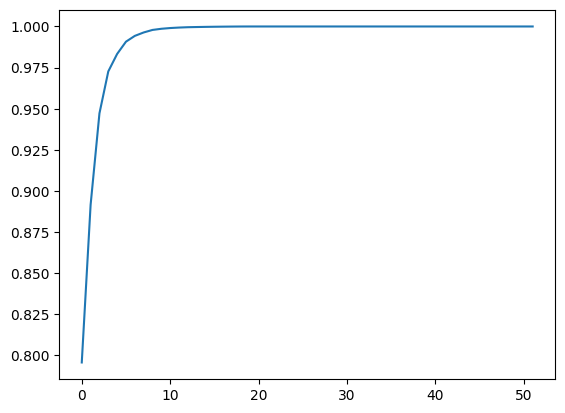

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
#with 12 PC we can explain the full data

#### t-sne

In [ ]:
#T-SNE

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne_train = tsne.fit_transform(X_train_scaled)
X_tsne_test = tsne.fit_transform(X_test_scaled)

In [ ]:
X_tsne_train.shape

(2522, 2)

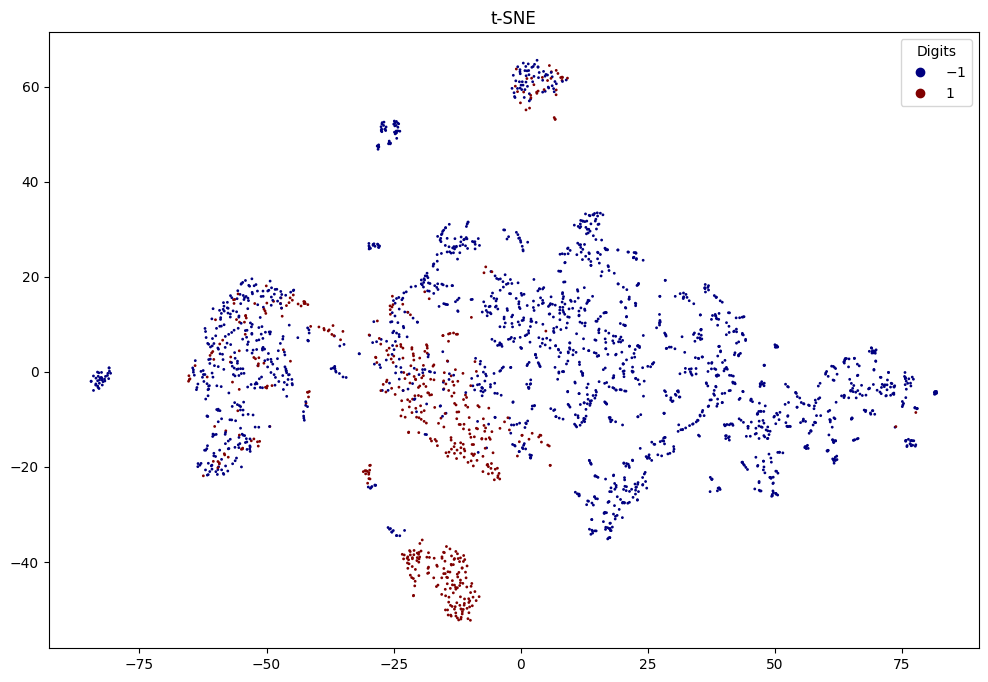

In [ ]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne_train[:, 0], X_tsne_train[:, 1], c=y_train.astype(int), cmap='jet', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE')
plt.show()

In [ ]:
tsne.kl_divergence_

0.6365786790847778

In [ ]:
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne_train = tsne.fit_transform(X_train_scaled)
X_tsne_test = tsne.fit_transform(X_test_scaled)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=X_tsne_train[:,0], y=X_tsne_train[:,1],z=X_tsne_train[:,2],
              color=y_train)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

### Rough work for visualizing working of svm

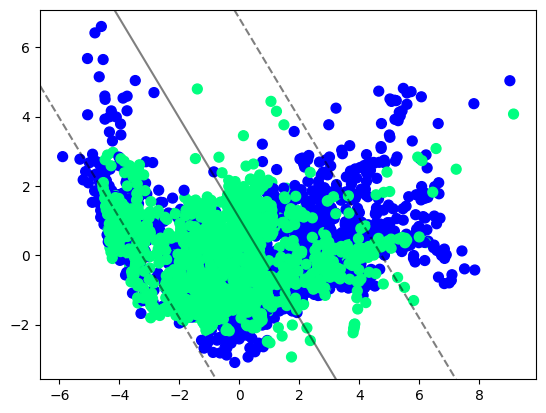

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



plt.scatter(X_train_trf[:, 0], X_train_trf[:, 1], c=y_sm, s=50, cmap='winter')
plot_svc_decision_function(clf1);


<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

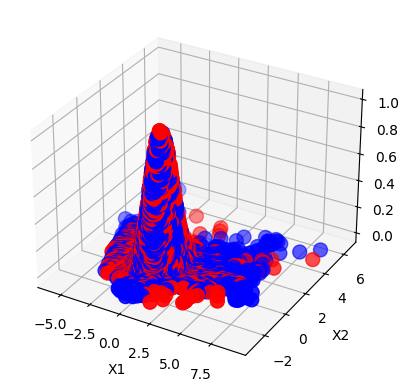

In [ ]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

plot_3d_plot(X_train_trf,y_sm)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf1 = SVC(kernel='rbf', C=1.0)

clf1.fit(X_train_trf, y_sm)

y_pred1 = clf1.predict(X_val_trf)

accuracy1 = accuracy_score(y_val, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.6147757255936676


<ipython-input-72-28f36a4f7633>:19: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



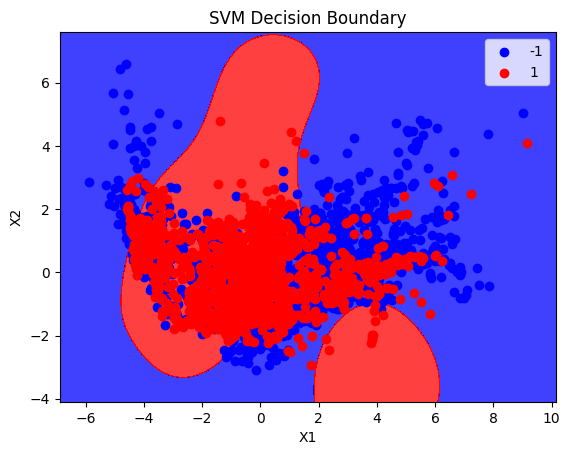

In [ ]:
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

plot_decision_boundary(X_train_trf, y_sm, clf1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf_poly = SVC(kernel='poly',degree=2 ,C=1.0)

clf_poly.fit(X_train_trf, y_sm)

y_pred1 = clf_poly.predict(X_val_trf)

acc_poly = accuracy_score(y_val, y_pred1)
print("Accuracy:", acc_poly)

Accuracy: 0.46701846965699206


<ipython-input-72-28f36a4f7633>:19: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



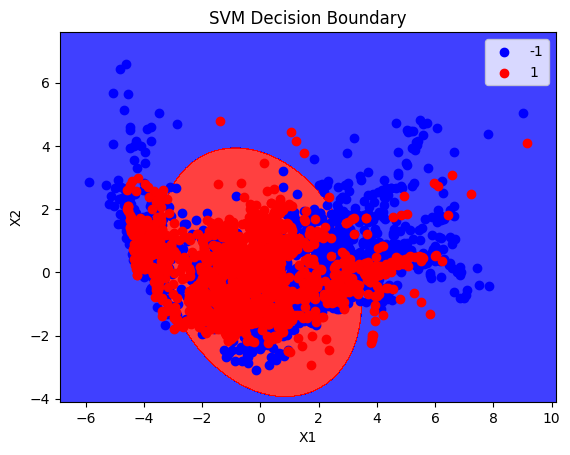

In [ ]:
plot_decision_boundary(X_train_trf, y_sm, clf_poly)

# statistical features && mfcc features

## model building

**Model Accuracy without feature selection**

In [ ]:
### SVM Model is trained all Features

import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf1 = SVC(kernel='linear', C=1.0)

clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.8748019017432647


In [ ]:
### Random Forest Classifier Training for all features

from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
clf_RF = RandomForestClassifier(max_depth=10, random_state=0)

clf_RF.fit(np.array(X_train), y_train)
y_pred_RF = clf_RF.predict(np.array(X_test))


accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("\n---Accuracy of Random forest ------------------\n\n:", accuracy_RF)



---Accuracy of Random forest ------------------

: 0.9255150554675119


In [ ]:


from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 8,
            'alpha': 100,
            'learning_rate': 0.01,
            'n_estimators':20
        }


xgb_clf = XGBClassifier(**params)


xgb_clf.fit(np.array(X_train), np.array(y_train))

y_pred_xg = xgb_clf.predict(np.array(X_test))

accuracy_f = accuracy_score(y_test, y_pred_xg)
print("\n--Accuracy of Xg Boost------\n:", accuracy_f)



--Accuracy of Xg Boost------
: 0.14896988906497624


***Feature Selection using Genetic Algorithm***

In [ ]:
import pandas as pd
import numpy as np
ga_input= pd.read_csv('final_features.csv')

l1=ga_input['mfccAndstats'].tolist()
for i in range(len(l1)):
  l1[i]=l1[i].split(',')
  for j in range(len(l1[i])):
    l1[i][j]=float(l1[i][j].strip("[]"))


In [ ]:
l1=np.array(l1)
n = l1.shape[1]
N = l1.shape[0]

np.random.seed(0)
classes = ga_input["class"]
classes = np.array([i if i != -1 else 0 for i in classes])
classes
np.random.seed(0)
# Shuffle Dataset and Classes
shuffler = np.random.permutation(len(l1))
l1 = l1[shuffler]
classes = classes[shuffler]



In [ ]:
def crossover(p1,p2):
  r = np.random.randint(0,len(p1))
  c1 = list(p1[:r]) + list(p2[r:])
  c2 = list(p2[:r]) + list(p1 [r:])
  return np.array(c1),np.array(c2)
#crossover([1,2,4,5,5,6,8,9,0,9],[5,6,7,8,6,7,3,4,8,9])

In [ ]:

def mutation(c):
  r = np.random.randint(0,len(c))
  c[r] = c[r] ^ 1
  return np.array(c)

#mutation([1,0,1,0,1,1,1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
def objective(vector):
  dataset = vector * l1
  e = KNN.fit(dataset, classes)
  return round(KNN.score(dataset,classes),2)


#objective([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
#       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
#       0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
import warnings
warnings.simplefilter("ignore")


In [ ]:
pop_size = 25
np.random.seed(0)
temp = np.array([np.array([np.random.randint(0,2) for _ in range(n)]) for _ in range(pop_size)])
population = np.array([[i, objective(i)] for i in temp])
population[:,1]
iterations = 50
for itr in range(iterations):
  # Crossover:
  np.random.seed(0)
  random_list = np.random.permutation(pop_size)
  j = 1
  for i in range(pop_size):
    if i+1 >= pop_size:
      break
    p1 = random_list[i]
    p2 = random_list[i+1]
    c1,c2 = crossover(population[p1,0], population[p2,0])
    t1 = [c1, objective(c1)]
    t2 = [c2, objective(c2)]
    temp = list(population)
    temp.extend([t1,t2])
    population = np.array(temp)
  # Mutation:
  random_list = np.random.permutation(len(population))
  for i in range(len(population) // 3):
    p1 = random_list[i]
    c1 = mutation(population[p1,0])
    t1 = [c1, objective(c1)]
    temp = list(population)
    temp.append(t1)
    population = np.array(temp)
  # Selection:
  temp = np.array(sorted(population, key = lambda x : x[1], reverse = True))
  population  = temp[:pop_size,:]






In [ ]:
dataset = population[0,0] * l1
pd.DataFrame(dataset).to_csv("Selected Features.csv")


In [ ]:
population[0,0]

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
population[:,1]

array([0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94], dtype=object)

**Classifier Models used: Random Forest, SVM, Xg Boost**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_tr, X_te, y_tr, y_te= train_test_split(dataset,classes,test_size=0.2)


---Accuracy of Random forest ------------------

: 0.9112519809825673

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       499
           1       0.87      0.68      0.76       132

    accuracy                           0.91       631
   macro avg       0.89      0.83      0.85       631
weighted avg       0.91      0.91      0.91       631



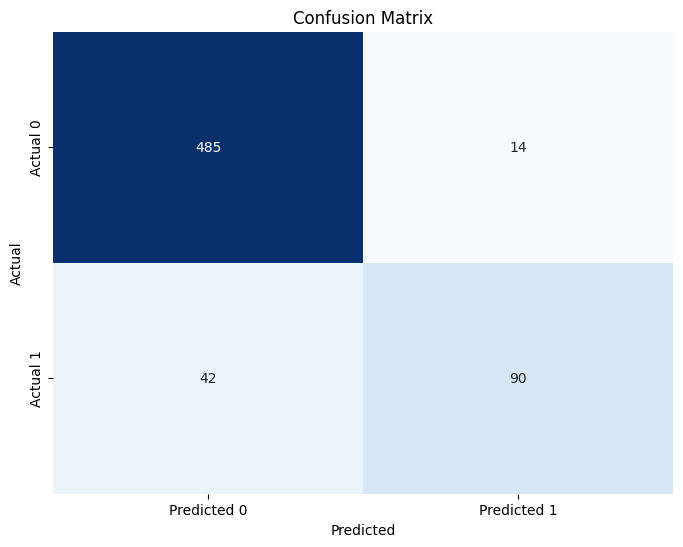

In [ ]:
### Random Forest Classifier Training { 0: Normal and 1 : Abnormal }

from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

clf_RF = RandomForestClassifier(max_depth= 10, random_state=0)

clf_RF.fit(np.array(X_tr), y_tr)
y_pred_RF = clf_RF.predict(np.array(X_te))


accuracy_RF = accuracy_score(y_te, y_pred_RF)
print("\n---Accuracy of Random forest ------------------\n\n:", accuracy_RF)

# Generate a classification report
class_report = classification_report(y_te, y_pred_RF)

# Print the classification report
print('\nClassification Report for Random Forest:\n', class_report)


# Compute confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_te, np.array(y_pred_RF))

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_Label= pd.DataFrame()
y_pred_RF_test = clf_RF.predict(np.array(X_te))
X_Label['RF label'] = y_pred_RF_test

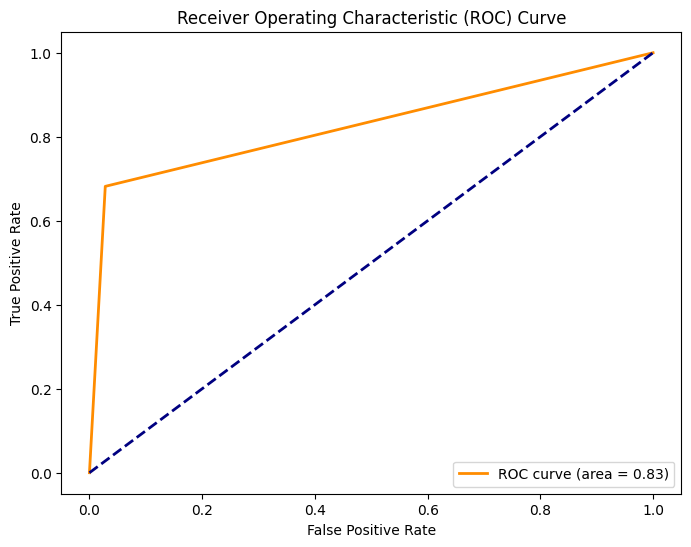

In [ ]:
 from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_te, np.array(y_pred_RF))
roc_auc = auc(fpr, tpr)

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
#plt.show()


--Accuracy of SVM------
: 0.8890649762282092

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       499
           1       0.78      0.66      0.71       132

    accuracy                           0.89       631
   macro avg       0.85      0.80      0.82       631
weighted avg       0.88      0.89      0.89       631



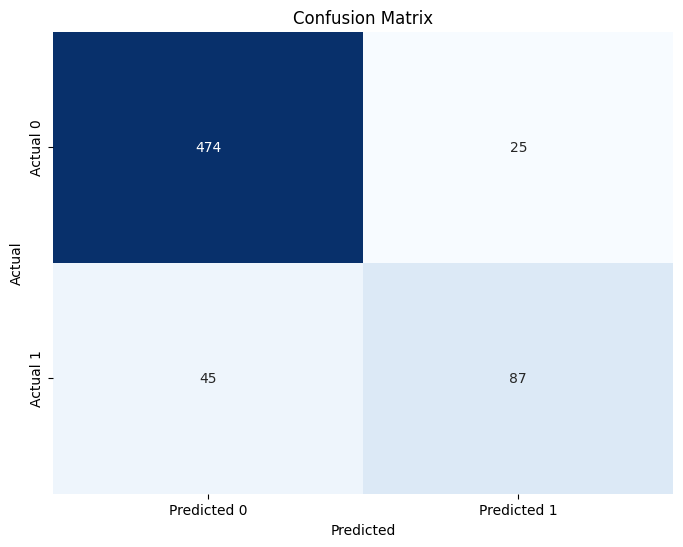

In [ ]:
### SVM Classifier training {0: Normal and 1 : Abnormal }

import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf_svm = SVC(kernel='linear', C=1.0)

clf_svm.fit(np.array(X_tr), y_tr)

y_pred_svm = clf_svm.predict(np.array(X_te))

X_tr= pd.DataFrame(X_tr)

accuracy_f = accuracy_score(y_te, y_pred_svm)
print("\n--Accuracy of SVM------\n:", accuracy_f)

class_report = classification_report(y_te, y_pred_svm)

# Print the classification report
print('\nClassification Report for SVM:\n', class_report)

cm = confusion_matrix(y_te, np.array(y_pred_svm))

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

y_pred_SVM_test = clf_svm.predict(np.array(X_te))
X_Label['SVM label'] = y_pred_SVM_test


--Accuracy of Xg Boost------
: 0.8890649762282092


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       499
           1       0.91      0.55      0.68       132

    accuracy                           0.89       631
   macro avg       0.90      0.77      0.81       631
weighted avg       0.90      0.89      0.88       631



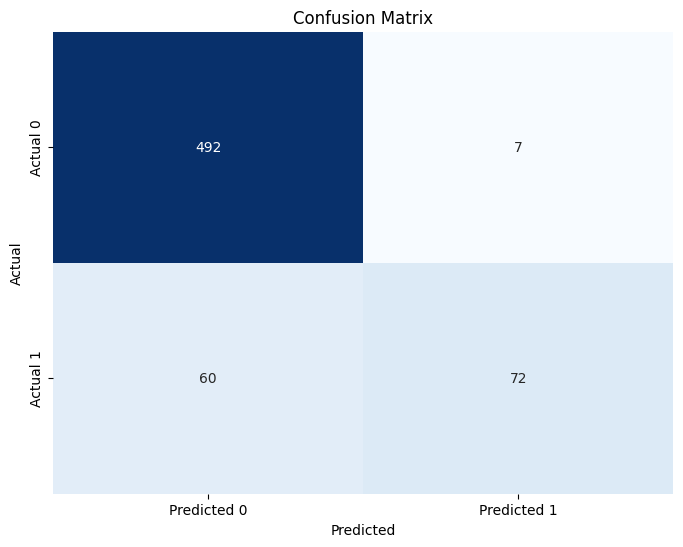

In [ ]:
# import XGBoost { 0: Normal and 1 : Abnormal }
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# define data_dmatrix
#data_dmatrix = xgb.DMatrix(data= dataset, label=classes)

from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 8,
            'alpha': 10,
            'learning_rate': 0.01,
            'n_estimators':100
        }


xgb_clf = XGBClassifier(**params)


xgb_clf.fit(np.array(X_tr), y_tr)

y_pred_xg = xgb_clf.predict(np.array(X_te))

accuracy = accuracy_score(y_te, y_pred_xg)
print("\n--Accuracy of Xg Boost------\n:", accuracy_f)

class_report = classification_report(y_te, y_pred_xg)

# Print the classification report
print('\n\nClassification Report for XGBoost:\n', class_report)

cm = confusion_matrix(y_te, np.array(y_pred_xg))

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_pred_xg_test = xgb_clf.predict(np.array(X_te))
X_Label['Xg label'] = y_pred_xg_test

In [ ]:
def row_mode(row):
    return row.mode().iloc[0] if not row.mode().empty else None

X_Label['Final Label'] = X_Label[['RF label', 'SVM label', 'Xg label']].apply(row_mode, axis=1)
X_Label['True Label']= y_te


---------------Accuracy of Ensemble ------------------

: 0.9080824088748018


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       499
           1       0.87      0.66      0.75       132

    accuracy                           0.91       631
   macro avg       0.89      0.82      0.85       631
weighted avg       0.91      0.91      0.90       631



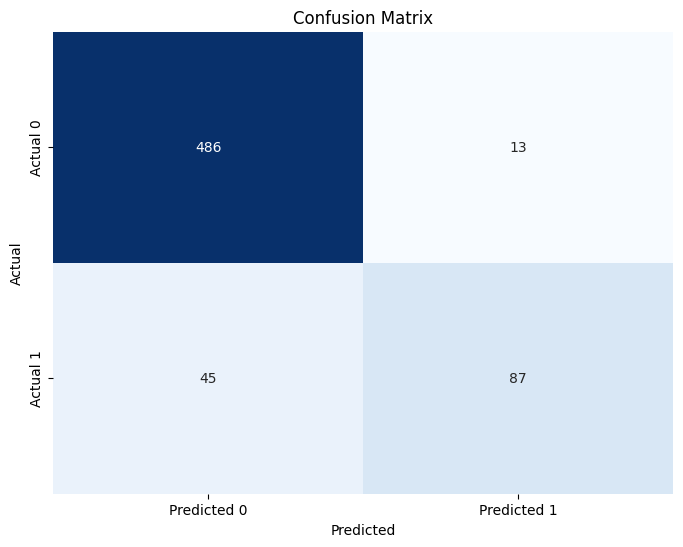

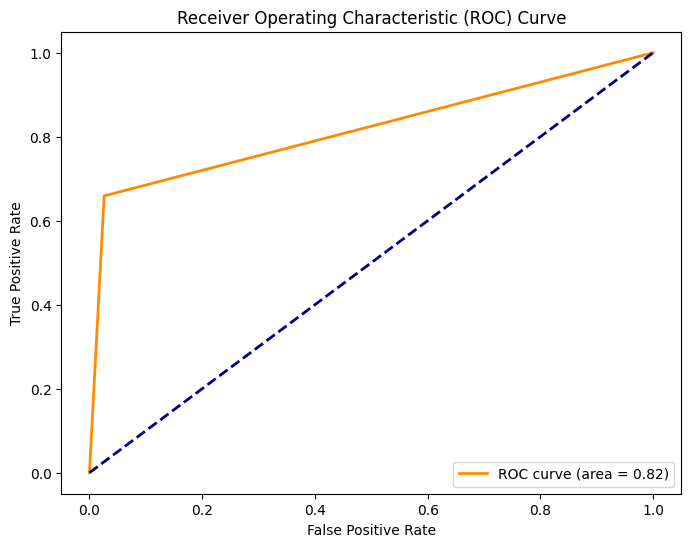

In [ ]:
### overall ensemble metrics { 0: Normal and 1 : Abnormal }

accuracy_score_xg = accuracy_score(y_te, np.array(X_Label['Final Label']))
precision = precision_score(y_te, np.array(X_Label['Final Label']))
recall = recall_score(y_te, np.array(X_Label['Final Label']))


print("\n---------------Accuracy of Ensemble ------------------\n\n:", accuracy_score_xg)

class_report = classification_report(y_te, np.array(X_Label['Final Label']))

# Print the classification report
print('\n\nClassification Report for XGBoost:\n', class_report)

cm = confusion_matrix(y_te,np.array(X_Label['Final Label']))

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_te, np.array(X_Label['Final Label']))
roc_auc = auc(fpr, tpr)

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()